Importing required packages:

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# ps2020 stands for pitching_stats 2020:
data_ps2020 = pd.read_excel("pitching_stats.xls")
data_ps2020.head()

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,AlbertÿAbreu\abreual01,24,NYY,AL,0,1,0.000,20.25,2,...,0,11,27.0,16.69,4.500,27.0,6.8,13.5,13.5,1.00
1,2,BryanÿAbreu\abreubr01,23,HOU,AL,0,0,NaN,2.70,4,...,0,20,183.0,9.49,2.400,2.7,0.0,18.9,8.1,0.43
2,3,JasonÿAdam\adamja01,28,CHC,NL,2,1,0.667,3.29,13,...,0,58,138.0,3.78,1.244,5.9,1.3,5.3,13.8,2.63
3,4,AustinÿAdams\adamsau02,29,SDP,NL,0,0,NaN,4.50,3,...,1,17,103.0,4.44,1.250,6.8,2.3,4.5,15.8,3.50
4,5,ChanceÿAdams\adamsch01,25,KCR,AL,0,0,NaN,9.35,6,...,2,40,51.0,3.31,1.731,15.6,1.0,0.0,6.2,NaN


# Model Alterations
    RK: Rank 
    G: Games
    GS: Games started
    IP: Innings pitched
    ER: Earned runs
    K: Strikeouts
    SV: Saves
    SHO: Shutouts
    W-L: Wins-Losses
    
    CYP: In The Neyer/James Guide To Pitchers -- co-authored by Bill James and ESPN.com's Rob Neyer presents a method, based on past results, to predict Cy Young balloting. This report provides an in-season snapshot of the Cy Young "race," as figured by the following formula: Cy Young Points 
    
    (CYP) = ((5*IP/9)-ER) + (SO/12) + (SV*2.5) + Shutouts + ((W*6)-(L*2)) + VB 
    VB: Victory Bonus is a 12-point bonus awarded for leading your team to the division championship. (***Is not included in the model.)

In [3]:
#cyp for each row:
ip,er,so,sv,shutouts,w,l  = data_ps2020["IP"],data_ps2020["ER"],data_ps2020["SO"],data_ps2020["SV"],data_ps2020["SHO"],data_ps2020["W"],data_ps2020["L"]
CYP = []
for i in range(data_ps2020.shape[0]):
    cyp = [5 * (ip[i] / 9)] - er[i] +(so[i] / 12) + (sv[i] * 2.5)+ shutouts [i] +((w[i] * 6) - (l[i] * 2)) + 0
    CYP.append(int(cyp))
data_ps2020["CYP"] = CYP

### Top 30 MLB starters

In [4]:
filtered_data2020 = data_ps2020[(data_ps2020["GS"] > 10) & (data_ps2020["CYP"] > 32)].sort_values("CYP", ascending=False)
filtered_data2020 = filtered_data2020 [['Name','Tm','Lg','GS','IP','ER','SO','SV','SHO','W','L','CYP']]
filtered_data2020

,Name,Tm,Lg,GS,IP,ER,SO,SV,SHO,W,L,CYP
65,ShaneÿBieber\biebesh01,CLE,AL,12,77.1,14,122,0,0,8,1,85
164,YuÿDarvish\darviyu01,CHC,NL,12,76.0,17,93,0,0,8,3,74
233,MaxÿFried*\friedma01,ATL,NL,11,56.0,14,50,0,0,7,0,63
146,GerritÿCole\colege01,NYY,AL,12,73.0,23,94,0,1,7,3,62
50,TrevorÿBauer\bauertr01,CIN,NL,11,73.0,14,100,0,2,5,4,58
272,MarcoÿGonzales*\gonzama02,SEA,AL,11,69.2,24,64,0,0,7,2,57
443,KentaÿMaeda\maedake01,MIN,AL,11,66.2,20,80,0,0,6,1,57
167,ZachÿDavies\davieza02,SDP,NL,12,69.1,21,63,0,0,7,4,56
385,DallasÿKeuchel*\keuchda01,CHW,AL,11,63.1,14,42,0,0,6,2,56
441,LanceÿLynn\lynnla01,TEX,AL,13,84.0,31,89,0,0,6,3,53


In [5]:
data_ps2020[['GS','IP','ER','SO','SV','SHO','W','L','CYP']].describe().T

,count,mean,std,min,25%,50%,75%,max
GS,805.0,2.336646,3.816984,0.0,0.0,0.0,4.0,13.0
IP,805.0,19.973168,18.098953,0.1,6.0,16.1,26.0,84.0
ER,805.0,10.063354,8.794770,0.0,4.0,7.0,14.0,45.0
SO,805.0,20.411180,19.452548,0.0,6.0,16.0,28.0,122.0
SV,805.0,0.575155,1.846303,0.0,0.0,0.0,0.0,16.0
SHO,805.0,0.017391,0.139992,0.0,0.0,0.0,0.0,2.0
W,805.0,1.167702,1.517051,0.0,0.0,1.0,2.0,8.0
L,805.0,1.177640,1.497758,0.0,0.0,1.0,2.0,9.0
CYP,805.0,8.660870,14.923621,-24.0,-1.0,4.0,16.0,85.0


In [6]:
#cyp for each row in Pitching dataset:
data_p = pd.read_csv("Pitching.csv")


In [7]:
data_p.shape

(47628, 30)

In [8]:
data_p["IP"] =  [int(i/3) for i in data_p["IPouts"]] #since it is mentioned that we can calculate IP by dividing the IPouts by 3;
ip,er,so,sv,shutouts,w,l  = data_p["IP"],data_p["ER"],data_p["SO"],data_p["SV"],data_p["SHO"],data_p["W"],data_p["L"]
CYP = []
for i in range(data_p.shape[0]):
    cyp = [(5 * (ip[i] / 9))] - er[i] +(so[i] / 12) + (sv[i] * 2.5)+ shutouts [i] +((w[i] * 6) - (l[i] * 2)) + 0
    CYP.append(int(cyp))
data_p["CYP"] = CYP

In [9]:
data_p.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,CYP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,0,146.0,0,42,NaN,NaN,NaN,26,-6
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,0,1291.0,0,292,NaN,NaN,NaN,264,57
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,0,14.0,0,9,NaN,NaN,NaN,1,-2
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,0,1080.0,1,257,NaN,NaN,NaN,213,9
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,57.0,0,21,NaN,NaN,NaN,9,-7


In [10]:
##adding the CYA column based on the CY YOUNG Award recipients table - used on pitching table:
# reading AwardsSharePlayers data
data_aw = pd.read_csv("AwardsSharePlayers.csv").reset_index(drop = True)

In [11]:
data_aw.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


In [12]:
# 2. Adding awardID to the dataset (0/1 column):
data_merged = data_p.merge(data_aw, on=['playerID','yearID'], how='left')
# adding 0 or 1 column for CYA and MVP:
CYA = []
MVP = []
for i in range(data_merged.shape[0]):
    cya = 0
    mvp = 0
    if data_merged["awardID"][i] == "Cy Young":
        cya = 1
        mvp =0
    elif data_merged["awardID"][i] == "MVP":
        cya = 0
        mvp =1
    else:
        cya = 0
        mvp =0
    CYA.append(int(cya))
    MVP.append(int(mvp))
data_merged ["CYA"],data_merged ["MVP"] = CYA, MVP

data_final = data_merged.drop(['votesFirst','pointsMax','lgID_y','awardID','pointsWon'],axis = 1)



### Filtering the dataset based on CYP column (for Cy Young Awards):

In [13]:
# # filtering from 1950 to 2017
data_final_flt = data_final[(data_final["yearID"]>= 1950) & (data_final["yearID"] <= 2017) & (data_final["CYP"] >= 80)].reset_index(drop = True)

In [14]:
data_final_flt[['GS','IP','ER','SO','SV','SHO','W','L','CYP']].describe()

,GS,IP,ER,SO,SV,SHO,W,L,CYP
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,22.472956,180.480524,63.810965,127.874654,7.121100,1.381946,12.606793,8.224663,124.998154
std,14.462133,69.603613,28.837946,57.312684,12.804018,1.741234,5.321643,3.814078,36.351634
min,0.000000,31.000000,4.000000,19.000000,0.000000,0.000000,0.000000,0.000000,80.000000
25%,1.000000,119.000000,37.000000,83.000000,0.000000,0.000000,9.000000,5.000000,96.000000
50%,30.000000,197.000000,70.000000,122.000000,0.000000,1.000000,13.000000,8.000000,117.000000
75%,33.000000,231.000000,86.000000,164.000000,9.000000,2.000000,16.000000,11.000000,146.000000
max,49.000000,376.000000,148.000000,383.000000,62.000000,13.000000,31.000000,21.000000,317.000000


In [15]:
# CYA column, value counts:
print(f"***whole dataset****")
print(data_final_flt["CYA"].value_counts(normalize=True))

***whole dataset****
0    0.85564
1    0.14436
Name: CYA, dtype: float64


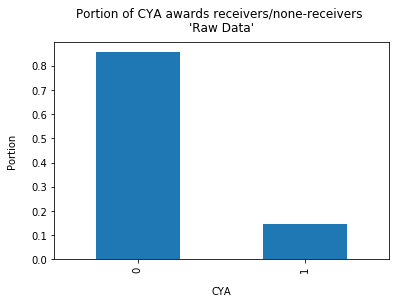

In [16]:
import seaborn as sns
data_final_flt["CYA"].value_counts(normalize=True).plot(kind='bar');
plt.xlabel("CYA", labelpad=14)
plt.ylabel("Portion", labelpad=14)
plt.title(f"Portion of CYA awards receivers/none-receivers \n'Raw Data'", y=1.02);

In [32]:
data_final_flt.to_csv("CyYoungAward_Data.csv")

In [33]:
# handling the imbalanced dataset:
# upsampling:
from sklearn.utils import resample
data_majority = data_final_flt[data_final_flt["CYA"]==0]
data_minority = data_final_flt[data_final_flt["CYA"]==1]

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4635,    # to match majority class
                                 random_state=123) # reproducible results
data_minority_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [34]:
data_minority_upsampled["CYA"].value_counts()
data = data_minority_upsampled


In [35]:
data.to_csv("CyYoungAward_Data_UpSampled.csv")

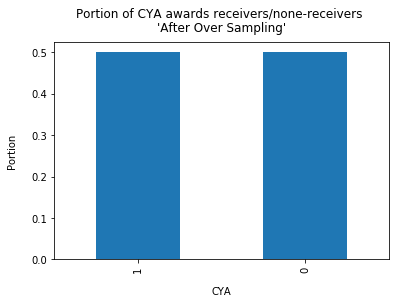

In [21]:
data["CYA"].value_counts(normalize=True).plot(kind='bar');
plt.xlabel("CYA", labelpad=14)
plt.ylabel("Portion", labelpad=14)
plt.title(f"Portion of CYA awards receivers/none-receivers \n'After Over Sampling'", y=1.02);

In [22]:
#spliting the data:
from sklearn.model_selection import train_test_split

# for CYA:
X = data[["GS" ,"IP","ER", "SO", "SV","W" ,"L"]]
y = data[["CYA"]]

x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.2,random_state = 0)

In [23]:
#summary of the table:
print(f"***train dataset****")
print(y_train["CYA"].value_counts(normalize=True))
print(f"****test dataset****")
print(y_test["CYA"].value_counts(normalize=True))
# data is not imbalanced

***train dataset****
1    0.501348
0    0.498652
Name: CYA, dtype: float64
****test dataset****
0    0.505394
1    0.494606
Name: CYA, dtype: float64


Train and Test datasets are balanced on CYA column;

In [24]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(7416, 1)
(7416, 7)
(1854, 1)
(1854, 7)


## Logistic Regression:

In [25]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.coef_

array([[ 0.04392011,  0.0096607 , -0.04362622,  0.01037656,  0.0880325 ,
         0.26659833, -0.16374902]])

In [27]:
lr.intercept_

array([-4.50405477])

In [28]:
#model evaluation:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)
metrics.accuracy_score(y_train,lr_train_pred), metrics.accuracy_score(y_test,lr_test_pred)

(0.7837108953613808, 0.7551240560949298)

In [29]:
y_hats = lr.predict(x_test)

y_test['preds'] = y_hats

df_out = pd.merge(data,y_test[['preds']],how = 'left',left_index = True, right_index = True)
df_out  = df_out.dropna().drop_duplicates()
df_outx= df_out[(df_out["yearID"] >= 2017)]
df_outx

,playerID,yearID,stint,teamID,lgID_x,W,L,G,GS,CG,...,GF,R,SH,SF,GIDP,IP,CYP,CYA,MVP,preds
5363,chacijh01,2017,1,SDN,NL,13,10,32,32,0,...,0,82,6.0,6.0,16.0,180,92,0,0,0.0
5367,colege01,2017,1,PIT,NL,12,12,33,33,0,...,0,98,5.0,1.0,16.0,203,81,0,0,0.0
5369,corbipa01,2017,1,ARI,NL,14,13,33,32,0,...,0,97,4.0,5.0,14.0,189,92,0,0,0.0
5370,davieza01,2017,1,MIL,NL,17,9,33,33,0,...,0,90,7.0,5.0,22.0,191,117,0,0,0.0
5371,daviswa01,2017,1,CHN,NL,4,2,59,0,0,...,56,16,1.0,0.0,6.0,58,123,0,0,0.0
5380,hollagr01,2017,1,COL,NL,3,6,61,0,0,...,58,24,0.0,1.0,5.0,57,123,0,0,0.0
5390,lestejo01,2017,1,CHN,NL,13,8,32,32,1,...,0,101,4.0,4.0,13.0,180,90,0,0,0.0
5399,paxtoja01,2017,1,SEA,AL,12,5,24,24,0,...,0,47,1.0,5.0,7.0,136,105,0,0,0.0
5406,salech01,2017,1,BOS,AL,17,8,32,32,1,...,0,73,2.0,4.0,11.0,214,161,0,0,1.0
5407,santaer01,2017,1,MIN,AL,16,8,33,33,5,...,0,85,4.0,4.0,8.0,211,137,0,0,1.0


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_test_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [ ]:
test_cm = metrics.confusion_matrix(y_test,lr_test_pred)
test_cm

In [ ]:
#confusion matrix plot:
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

In [ ]:
cohen_kappa_score(y_test, lr_test_pred)

In [ ]:
mean_absolute_error(y_test,lr_test_pred)

In [ ]:
mean_squared_error(y_test,lr_test_pred)

In [ ]:
r2_score(y_test,lr_test_pred)

## Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3,
                                                     random_state = 0)
NB = GaussianNB()
NB.fit(x_train,y_train)
NB_train_pred = NB.predict(x_train)
NB_test_pred = NB.predict(x_test)

In [ ]:
metrics.accuracy_score(y_train,NB_train_pred)

In [ ]:
metrics.accuracy_score(y_test,NB_test_pred)

In [ ]:
print(classification_report(y_test,NB_test_pred))

In [ ]:
#confusion matrix:
test_cm = metrics.confusion_matrix(y_test,NB_test_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

In [ ]:
cohen_kappa_score(y_test, NB_test_pred)

In [ ]:
r2_score(y_test,NB_test_pred)

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
DT = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)

#-------------------
DT.fit(x_train,y_train)
DT_pred = DT.predict(x_test)
print(classification_report(y_test,DT_pred))

In [ ]:
test_cm = metrics.confusion_matrix(y_test,DT_pred)
#confusion matrix:
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

In [ ]:
cohen_kappa_score(y_test, DT_pred)

In [ ]:
r2_score(y_test,DT_pred)

In [ ]:
#importance of each value:
fi = DT.feature_importances_
pd.DataFrame({'variable':x_test.columns,
             'importance': fi })

## Neural Network

In [ ]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data[["GS" ,"IPouts","ER", "SO", "SV", "SHO" ,"W" ,"L"]]
y = data[["CYA"]]

x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
# #-------------------
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs',alpha=0.5,
                   hidden_layer_sizes=(10,4),random_state=1)
NN.fit(x_train_scaled,y_train)

In [ ]:
#prediction model:
NN_pred = NN.predict(x_test_scaled)
metrics.accuracy_score(NN_pred, y_test)

In [ ]:
print(classification_report(y_test,NN_pred))

In [ ]:
r2_score(y_test,NN_pred)

In [ ]:
#confusion matrix:
test_cm = metrics.confusion_matrix(y_test,NN_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

## Support Vector Machine

In [ ]:
from sklearn import svm
scaler = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
# -------------------
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [ ]:
#SVM Linear:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train_scaled,y_train)

In [ ]:
svm_linear.coef_

In [ ]:
##SVM Linear - Prediction Model:
svm_linear_pred = svm_linear.predict(x_test_scaled)
metrics.accuracy_score(y_test,svm_linear_pred)

In [ ]:
print(classification_report(y_test,svm_linear_pred))
#All other SVM methods (RBF, Poly) gave the same results, so I just put the Linear method in the report:

In [ ]:
#confusion matrix:
test_cm = metrics.confusion_matrix(y_test,svm_linear_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

## Random Forests

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(x_train,y_train)

In [ ]:
RF_pred = RF.predict(x_test)
metrics.accuracy_score(RF_pred,y_test)

In [ ]:
print(classification_report(y_test,RF_pred))

In [ ]:
fi = RF.feature_importances_
pd.DataFrame({'variable':x_test.columns,
             'importance': fi })

In [ ]:
from sklearn.model_selection import cross_val_score
n_estimator = range(2,104,2)
accuracy = []
for i in n_estimator:
    RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    scores = cross_val_score(RF,x_train,y_train)
    accuracy.append(scores.mean());

In [ ]:
fig = plt.figure();
ax0 = fig.add_subplot(111)
ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
plt.plot(n_estimator,accuracy);
plt.xlabel("n_estimator");
plt.ylabel("Accuracy");
plt.title("Accuracy vs. n_estimator");
txt = f"max accuracy:{round(ymax,5)}"
ax0.set_ylim(0.4,0.9);
ax0.annotate(txt, xy=(xmax, ymax), xytext=(xmax, ymax+0.06),
arrowprops=dict(facecolor='blue', shrink=0.05),);

## AdaBoost Classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_estimator = list(range(1,100,2))
accuracy = []
for i in n_estimator:
    Ada = AdaBoostClassifier(n_estimators = i, learning_rate=0.005, random_state=21)
    scores = cross_val_score(Ada,x_train,y_train)
    accuracy.append(scores.mean())

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(111)
plt.plot(n_estimator,accuracy)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Adaboost Accuracy");
ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
txt = f"max accuracy:{round(ymax,3)}"
ax.annotate(txt, xy=(xmax, ymax), xytext=(xmax, ymax+0.0029),
arrowprops=dict(facecolor='red', shrink=1),)
ax.set_ylim(0.100,1.00);

### MLB Most Valuable Player MVP Award Winners
The Most Valuable Player Award is given annually to one player in each league. The award began in 1911 as the Chalmers Award, honoring the "most important and useful player to the club and to the league". This award was discontinued in 1914. From 1922 to 1928 in the American League and from 1924 to 1929 in the National League, an MVP award was given to "the baseball player who is of the greatest all-around service to his club". Prior winners were not eligible to win the MVP award again during this time. The current incarnation of the MVP award was established in 1931. The Baseball Writers' Association of America (BBWAA) votes on the MVP award at the conclusion of each season before the postseason starts.

####    Dataset used: Batting.csv
    Variables used (Already in the dataset):
    H: Hits
    BB: Walks by batters
    HBP: Batters hit by pitch
    AB: At Bats
    SF : Sacrifice flies
    H, 2B, 3B: Hits, Doubles, Triples
    HR: Homeruns
    RBI: Runs batted in
    SB: Stolen Bases;
    
        

#### MVP Awards related variables (not in the dataset but calculated with formulas):
    • BA:Hits/At Bats (H/AB); 
    according to baseball reference website;
    • OBP: (H + BB + HBP) / (AB + BB + HBP + SF); 
    according to baseball reference website;
    • SLG: (H - X2B - X3B - HR + 2 * X2B + 3 * X3B + 4 * HR) / AB;
    according to Max Marchi and Jim Albert article;
    


In [39]:
data_bat = pd.read_csv("Batting.csv")

In [40]:
data_bat.shape

(107429, 22)

In [41]:
#importing data:

data_bat = data_bat[["playerID","yearID","H","BB","HBP","AB","SF","2B","3B","HR","RBI","SB"]]
data_bat_merged = data_bat.merge(data_aw, on=['playerID','yearID'], how='left')
# #------
MVP_bat = []
for i in range(data_bat_merged.shape[0]):
    mvp = 0
    if data_bat_merged["awardID"][i] == "MVP":
        mvp = 1
    else:
        mvp = 0
    MVP_bat.append(int(mvp))
data_bat_merged ["MVP"] = MVP_bat
data_bat_merged_final = data_bat_merged.drop(['votesFirst','lgID','pointsMax','awardID','pointsWon'],axis = 1)
#------
data_bat_merged_final.head()
dbmf = data_bat_merged_final
dbmf.fillna(0)

,playerID,yearID,H,BB,HBP,AB,SF,2B,3B,HR,RBI,SB,MVP
0,abercda01,1871,0,0,0.0,4,0.0,0,0,0,0.0,0.0,0
1,addybo01,1871,32,4,0.0,118,0.0,6,0,0,13.0,8.0,0
2,allisar01,1871,40,2,0.0,137,0.0,4,5,0,19.0,3.0,0
3,allisdo01,1871,44,0,0.0,133,0.0,10,2,2,27.0,1.0,0
4,ansonca01,1871,39,2,0.0,120,0.0,11,3,0,16.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108042,zimmejo02,2019,0,0,0.0,2,0.0,0,0,0,0.0,0.0,0
108043,zimmeky01,2019,0,0,0.0,0,0.0,0,0,0,0.0,0.0,0
108044,zimmery01,2019,44,17,0.0,171,2.0,9,0,6,27.0,0.0,0
108045,zobribe01,2019,39,23,1.0,150,2.0,5,0,1,17.0,0.0,0


In [42]:
## Calculating BA:
dbmf["BA"] =  [float(dbmf["H"][i]/dbmf["AB"][i]) for i in range(dbmf.shape[0])] 

In [43]:
## Calculating OBP: (H + BB + HBP) / (AB + BB + HBP + SF)
h,bb,hbp,ab,sf  = dbmf["H"],dbmf["BB"],dbmf["HBP"],dbmf["AB"],dbmf["SF"]
OBP = []
for i in range(dbmf.shape[0]): 
    obp = (h[i] + bb[i] + hbp[i]) / (ab[i] + bb [i] + hbp [i] + sf [i])        
    OBP.append(float(obp))
dbmf["OBP"] = OBP

In [44]:
## Calculating SLG: (H - X2B - X3B - HR + 2 * X2B + 3 * X3B + 4 * HR) / AB
b2,b3,hr  = dbmf["2B"],dbmf["3B"],dbmf["HR"]
SLG = []
for i in range(dbmf.shape[0]): 
    slg = ([h[i] - b2[i] - b3[i] - hr[i] + (2*b2[i]) + (3*b3[i]) + (4*hr[i])]/ ab[i])   
    SLG.append(float(slg))
dbmf["SLG"] = SLG

In [45]:
# droping unnecessary columns: 
dbmf = dbmf.drop (['H','2B','3B','AB','SF','HBP'],axis = 1)

In [46]:
dbmf.fillna(0)
dbmf.isna().sum() #there are too many null values that should be removed from dataset

playerID        0
yearID          0
BB              0
HR              0
RBI           756
SB           2368
MVP             0
BA          17009
OBP         52624
SLG         17009
dtype: int64

In [47]:
#dropping null values:
dbmf.dropna(inplace = True, how= "any")

In [48]:
dbmf.head()

,playerID,yearID,BB,HR,RBI,SB,MVP,BA,OBP,SLG
36914,aaronha01,1954,28,13,69.0,2.0,0,0.279915,0.322068,0.446581
36915,aberal01,1954,2,0,3.0,0.0,0,0.128205,0.166667,0.128205
36916,abramca01,1954,10,0,2.0,0.0,1,0.142857,0.307692,0.214286
36917,abramca01,1954,72,6,25.0,1.0,1,0.293144,0.400000,0.420804
36918,adamsbo03,1954,55,3,23.0,2.0,0,0.269231,0.362222,0.387179


In [51]:
dbmf["MVP"].value_counts(normalize=True)

0    0.941757
1    0.058243
Name: MVP, dtype: float64

In [52]:
dbmf.to_csv("MVPAward_Data.csv")

In [53]:
# filtering data from 1950 to 2017; 
# also trying to remove irrelevant values to balance the data as much as possible:
dbmf_flt = dbmf[(dbmf["yearID"]>= 1950)  & (dbmf["yearID"]<= 2017) & (dbmf["BA"] >= 0.267) & (dbmf["SLG"] >= 0.4889) & (dbmf["OBP"] >= 0.3441) & (dbmf["HR"] >= 2)].reset_index(drop = True)
dbmf_flt["MVP"].value_counts(normalize=True)

0    0.515625
1    0.484375
Name: MVP, dtype: float64

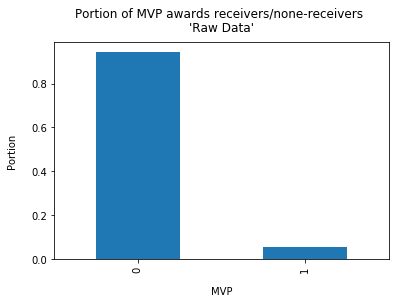

In [54]:
dbmf["MVP"].value_counts(normalize=True).plot(kind='bar');
plt.xlabel("MVP", labelpad=14)
plt.ylabel("Portion", labelpad=14)
plt.title(f"Portion of MVP awards receivers/none-receivers \n'Raw Data'", y=1.02);

In [55]:
dbmf_flt.to_csv("MVPAward_Data_Filtered.csv")

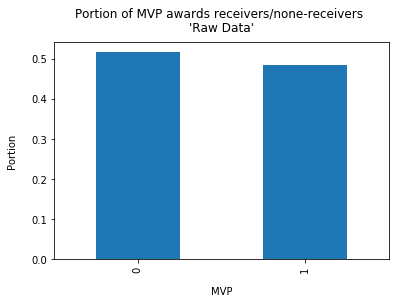

In [56]:
dbmf_flt["MVP"].value_counts(normalize=True).plot(kind='bar');
plt.xlabel("MVP", labelpad=14)
plt.ylabel("Portion", labelpad=14)
plt.title(f"Portion of MVP awards receivers/none-receivers \n'Raw Data'", y=1.02);

#### Dataset is balanced!

#### spliting the data:

In [ ]:


X = dbmf_flt[["BA" ,"OBP","SLG", "HR", "RBI","SB"]]
y = dbmf_flt[["MVP"]]

x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.2,random_state = 0)

## Logistic Regression:

In [ ]:
lr = linear_model.LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)
metrics.accuracy_score(y_train,lr_train_pred), metrics.accuracy_score(y_test,lr_test_pred)

In [ ]:
#confusion matrix plot:
test_cm = metrics.confusion_matrix(y_test,lr_test_pred)
print(classification_report(y_test,lr_test_pred));
print(test_cm);
plt.matshow(test_cm);
plt.title("Confusion Matrix");
plt.colorbar();
plt.ylabel("True Label");
plt.xlabel("Predicted Label");
plt.figure();

## Naïve Bayes

In [ ]:
NB = GaussianNB()
NB.fit(x_train,y_train)
NB_train_pred = NB.predict(x_train)
NB_test_pred = NB.predict(x_test)
metrics.accuracy_score(y_train,NB_train_pred)

In [ ]:
metrics.accuracy_score(y_test,NB_test_pred)

In [ ]:
print(classification_report(y_test,NB_test_pred))
#confusion matrix:
test_cm = metrics.confusion_matrix(y_test,NB_test_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

## Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
DT = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)

#-------------------
DT.fit(x_train,y_train)
DT_pred = DT.predict(x_test)

In [ ]:
test_cm = metrics.confusion_matrix(y_test,DT_pred)
print(classification_report(y_test,DT_pred))
#confusion matrix:
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
print(test_cm);

In [ ]:
#importance of each value:
fi = DT.feature_importances_
pd.DataFrame({'variable':x_test.columns,
             'importance': fi })

## Nerual Network

In [ ]:
scaler = MinMaxScaler()
X = dbmf_flt[["BA" ,"OBP","SLG", "HR", "RBI","SB"]]
y = dbmf_flt[["MVP"]]


x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
# #-------------------
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
NN = MLPClassifier(solver='lbfgs',alpha=0.5,
                   hidden_layer_sizes=(10,4),random_state=1)
NN.fit(x_train_scaled,y_train)
#prediction model:
NN_pred = NN.predict(x_test_scaled)
metrics.accuracy_score(NN_pred, y_test)

In [ ]:
print(classification_report(y_test,NN_pred))
test_cm = metrics.confusion_matrix(y_test,NN_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
test_cm = metrics.confusion_matrix(y_test,NN_pred)
print(test_cm)

## Support Vector Machine


In [ ]:
scaler = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.8, random_state = 0)
# -------------------
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
#SVM Linear:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train_scaled,y_train)
svm_linear.coef_

In [ ]:
svm_linear_pred = svm_linear.predict(x_test_scaled)
metrics.accuracy_score(y_test,svm_linear_pred)

In [ ]:

test_cm = metrics.confusion_matrix(y_test,svm_linear_pred)
plt.figure()
plt.matshow(test_cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
print(classification_report(y_test,svm_linear_pred))
print(test_cm)
#All other SVM methods (RBF, Poly) gave the same results, so I just put the Linear method in the report:

## Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(x_train,y_train)

In [ ]:
RF_pred = RF.predict(x_test)
metrics.accuracy_score(RF_pred,y_test)

In [ ]:
print(classification_report(y_test,RF_pred))

In [ ]:
fi = RF.feature_importances_
pd.DataFrame({'variable':x_test.columns,
             'importance': fi })

In [ ]:
from sklearn.model_selection import cross_val_score
n_estimator = range(2,100,2)
accuracy = []
for i in n_estimator:
    RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    scores = cross_val_score(RF,x_train,y_train)
    accuracy.append(scores.mean());

In [ ]:
fig = plt.figure();
ax0 = fig.add_subplot(111)
ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
plt.plot(n_estimator,accuracy);
plt.xlabel("n_estimator");
plt.ylabel("Accuracy");
plt.title("Accuracy vs. n_estimator");
txt = f"max accuracy:{round(ymax,12)}"
ax0.set_ylim(0.4,0.9);
ax0.annotate(txt, xy=(xmax, ymax), xytext=(xmax, ymax+0.03),
arrowprops=dict(facecolor='blue', shrink=0.05),);

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_estimator = list(range(1,100,2))
accuracy = []
for i in n_estimator:
    Ada = AdaBoostClassifier(n_estimators = i, learning_rate=0.005, random_state=21)
    scores = cross_val_score(Ada,x_train,y_train)
    accuracy.append(scores.mean())

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(111)
plt.plot(n_estimator,accuracy)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Adaboost Accuracy");
ymax = max(accuracy)
xpos = accuracy.index(ymax)
xmax = n_estimator[xpos]
txt = f"max accuracy:{round(ymax,3)}"
ax.annotate(txt, xy=(xmax, ymax), xytext=(xmax, ymax+0.0029),
arrowprops=dict(facecolor='red', shrink=1),)
ax.set_ylim(0.100,1.00);